Import core numerical and utility functionality

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os

from scipy.integrate import odeint

Setup

In [3]:
np.random.seed(42)

NAME = 'assignment2'
DATA_PATH = f'data/{NAME}'
MEDIA_PATH = f'media/{NAME}'
[os.makedirs(path, exist_ok=True) for path in [DATA_PATH, MEDIA_PATH]]
print('Setup complete')

Setup complete


## Part 1: Perfect Adaptation

### a) Rate-equation of $R$

Steady-state solution with rate constants plugged in:

$$
\begin{align*}
    \frac{dX}{dt} &=  S - X = 0 \implies X = S \\
    \frac{dR}{dt} &= 2 S - 2 X R = 2 S (1 - R) \\
\end{align*}
$$

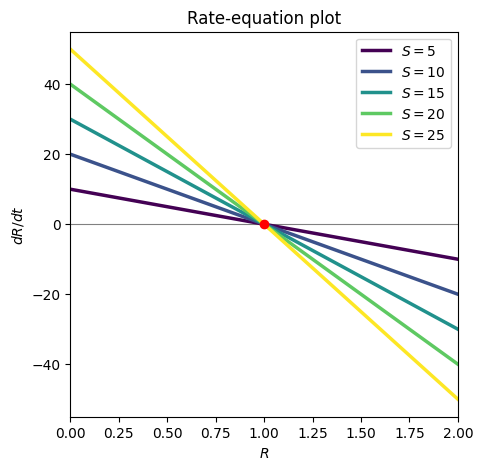

In [61]:
Ss = [5, 10, 15, 20, 25]
Rs = np.linspace(0, 2, 1000)

fig, ax = plt.subplots(1,1, figsize=(5,5))
cmap = plt.get_cmap(name="viridis", lut=len(Ss))

ax.hlines(0, 0, 2, lw=0.8, color="gray")
for (i, S) in enumerate(Ss):
    dRdt = 2 * S * (1 - Rs)
    ax.plot(Rs, dRdt, color=cmap(i), label=r"$S=$" + f"{S}", lw=2.5)

ax.scatter(1,0,color="red",zorder=10)
ax.set_xlabel(r"$R$")
ax.set_ylabel(r"$dR/dt$")
ax.set_xlim((0,2))
ax.set_title("Rate-equation plot")
ax.legend()

plt.show()

### b) Signal-response curve

It can be seen from the rate-equation plot of $R$, but also it can be derived analytically that:

$$ S \neq 0 \implies \left( \frac{dR}{dt} = 0 \iff R = 1 \right) $$

The equilibrium point $R^{*}$ is always equal to $1$ and is independent of $S$. The signal-response curve will be a horizontal line.

As can also be seen in the rate-equation plot, $\frac{dR}{dt} \gt 0$ leftwards from the equilibrium and $\frac{dR}{dt} \lt 0$ rightwards from the equilibrium. Thus, the equilbrium point $R^{*} = 1$ is stable.

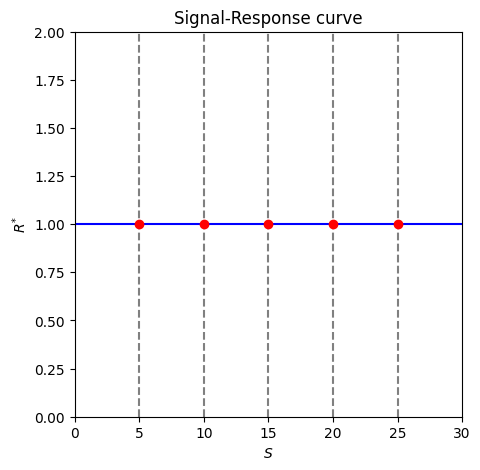

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.hlines(1, 0, 30, color="blue")
ax.scatter(Ss, np.ones(len(Ss)), color="red",zorder=10)

for (i, S) in enumerate(Ss):
    ax.vlines(S, 0, 2, linestyles="dashed", color="gray")

ax.set_xlabel(r"$S$")
ax.set_ylabel(r"$R^{*}$")

ax.set_xlim((0,30))
ax.set_ylim(0,2)
ax.set_title("Signal-Response curve")

plt.show()

### c)

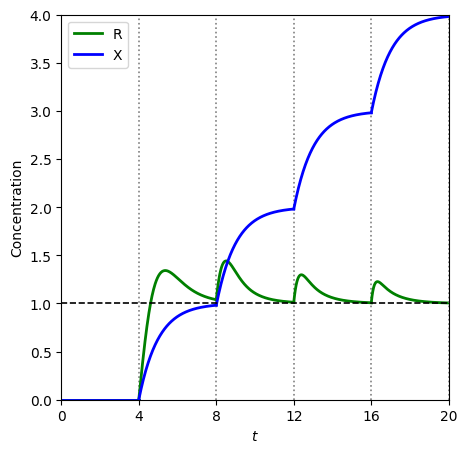

In [85]:
def perfect_adaptation(y0, t, S):
    R, X = y0
    dRdt = 2*S - 2*X*R
    dXdt = S - X
    dydt = [dRdt, dXdt]

    return dydt

Ss = np.array([0,1,2,3,4])
fig, ax = plt.subplots(1,1,figsize=(5,5))

R0 = 0
X0 = 0
y0 = [R0, X0]

for (i, S) in enumerate(Ss):
    t = np.linspace(i*4, (i+1)*4, 200)
    sol = odeint(perfect_adaptation, y0, t, args=(S,))

    R, X = sol[:, 0], sol[:, 1]
    ax.plot(t, R, color="green", lw=2.0)
    ax.plot(t, X, color="blue", lw=2.0)

    ax.vlines((i+1)*4, 0, 4, linestyles="dotted", lw=1.2, color="gray")

    y0 = [R[-1], X[-1]]

ax.hlines(1, 0, 20, linestyles="dashed", lw=1.2, color="black")

ax.set_xlim(0,20)
ax.set_ylim(0,4)
ax.set_xticks([0,4,8,12,16,20])
ax.set_xlabel(r"$t$")
ax.set_ylabel("Concentration")
ax.legend(["R", "X"])

plt.show()


The concentration of $R$ remains stable at the zero-level when $S=0$. This result could not be seen in the signal-response curve, as it was assumed that $S \neq 0$. Nonetheless, $S = 0$ is another solution for $\frac{dR}{dt} = 0$, which results in concentration of $R$ remaining at the same level for this time period.

For all remaining periods, where $S \in \{1,2,3,4\}$, the concentration of $R$ rises at first, but then starts to down-regulate and approaching $R^{*} = 1$. This corresponds with signal-response curve. Stable point $R^{*} = 1$ is independent of $S$.

The concentration of $X$ also corresponds with the previous derivation from $a)$, where, to achieve a steady-state solution, it was shown that $S = X$. At the beginning of each period, $X$ up-regulates. The increase is rapid at first, but then slows down and the concentration level approaches $X^{*}$ equal to the corresponding $S$.